<a href="https://colab.research.google.com/github/gabrielborja/machine_learning/blob/main/iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Data Analysis and Prediction

## Upload packages and data

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [ ]:
from google.colab import files
uploaded = files.upload()

In [11]:
import io
df = pd.read_csv(io.BytesIO(uploaded['iris_raw.csv']))

In [12]:
# Checking the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Data cleaning

In [13]:
# Dropping missing values by rows
df.dropna(axis=0, inplace=True)

In [15]:
# Describing the dataframe
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,145.000000,145.000000,145.000000,145.000000
mean,5.670303,3.046207,3.836552,1.236552
std,1.326540,0.435096,1.742955,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
#Cleaning missspelled classes
misspelled = {'Iris-setossa': 'Iris-setosa', 'versicolor': 'Iris-versicolor'}
df = df.replace(misspelled)
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

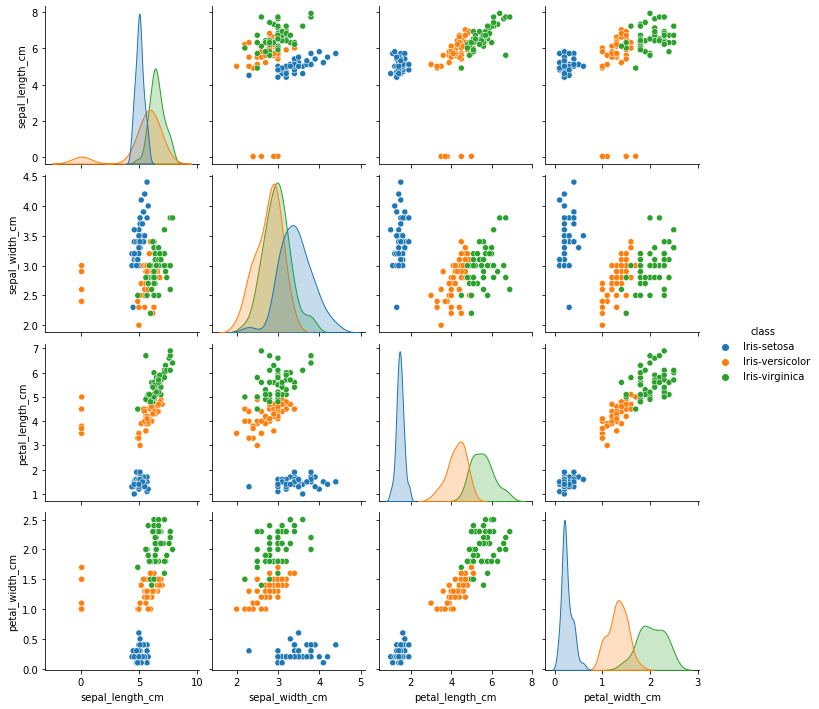

In [19]:
# Exploring relationships between classes
sns.pairplot(df, hue='class')
plt.show()

In [23]:
# Creating unique category lists
my_classes = df['class'].unique()
cat = df.columns[:-1]

In [29]:
# Visualizaing a table of proportions for each category
@interact(cls = my_classes, cat = cat)
def explore_categories(cls, cat):
  return df[df['class']==cls].value_counts(subset=cat, normalize=True).reset_index(name='Proportion')

interactive(children=(Dropdown(description='cls', options=('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')…

In [ ]:
# Filtering the dataframe to get rid of outliers in Iris-versicolor
df = df[~(df['sepal_length_cm']<=1.8)].copy()
df

In [ ]:
# Filtering the dataframe to get rid of outliers in sepal width
df = df[(df['sepal_width_cm']>= 2.5)]
df

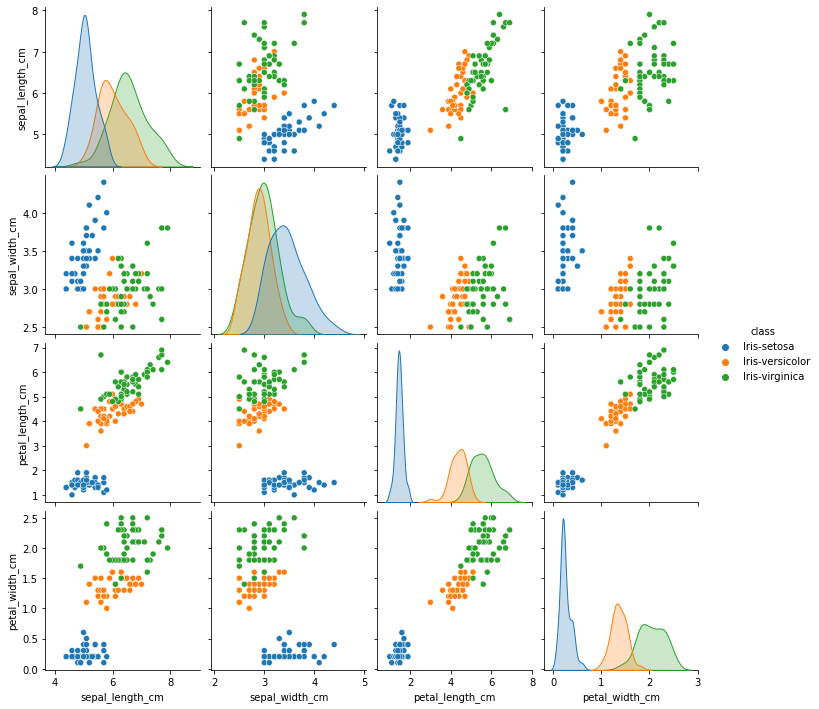

In [38]:
# Plotting the various categories
sns.pairplot(df, hue='class')
plt.show()

In [40]:
#Visualizing histograms for different categories
@interact(cls = my_classes, cat = cat)
def visualize_histograms(cls, cat):
  df[df['class']==cls][cat].hist()
  plt.title(f'Histogram of {cls} by {cat}')
  plt.show()

interactive(children=(Dropdown(description='cls', options=('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')…

In [42]:
# Saving cleaned dataframe to local disk
df.to_csv('iris_clean.csv', index=False)
files.download('iris_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Visualization and Predictions

In [43]:
# Loading file from local disk
from google.colab import files
uploaded1 = files.upload()

Saving iris_clean.csv to iris_clean (1).csv


In [45]:
# Saving file to pandas dataframe
import io
iris_df = pd.read_csv(io.BytesIO(uploaded1['iris_clean.csv']))
iris_df.tail()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
126,6.7,3.0,5.2,2.3,Iris-virginica
127,6.3,2.5,5.0,2.3,Iris-virginica
128,6.5,3.0,5.2,2.0,Iris-virginica
129,6.2,3.4,5.4,2.3,Iris-virginica
130,5.9,3.0,5.1,1.8,Iris-virginica


In [52]:
# Assert that file should only contain 3 classes
def check_df_consistency():
  assert len(iris_df['class'].unique()) == 3
  print('Dataframe contains 3 unique classes\n')
  print(iris_df['class'].unique())

check_df_consistency()

Dataframe contains 3 unique classes

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
